**Clustering**

# **Theoretical Questions**

**1. What is unsupervised learning in the context of machine learning?**

Unsupervised learning is a type of machine learning that uses algorithms to find patterns and relationships in unlabeled data, without any prior guidance or correct answers.

**2. How does K-Means clustering algorithm work?**

K-means clustering works by iteratively assigning data points to the nearest cluster centroid and then updating the centroid's position to be the mean of its assigned points.

**3.  Explain the concept of a dendrogram in hierarchical clustering?**

A dendrogram is a tree-like diagram used in hierarchical clustering to visualize the relationships between data points, showing how clusters are merged or divided at each step.

**4. What is the main difference between K-Means and Hierarchical Clustering?**

The main difference is that K-Means requires to specify the number of clusters (k) beforehand, while hierarchical clustering builds a hierarchy of clusters automatically without needing a pre-defined number.

K-Means partitions data into non-overlapping, flat clusters, whereas hierarchical clustering creates a nested, tree-like structure called a dendrogram that shows the relationships between clusters at different levels.

**5. What are the advantages of DBSCAN over K-Means?**

DBSCAN's main advantages over K-Means are its ability to identify arbitrary-shaped clusters, its automatic handling of noise and outliers, and that it does not require the number of clusters to be specified beforehand.

**6. When would you use Silhouette Score in clustering?**

We would use Silhouette Score to evaluate the quality of a clustering algorithm's results by measuring how well each data point fits into its assigned cluster and how separate it is from other clusters.

It's used when we need a quantitative measure of clustering performance, particularly to compare different numbers of clusters or different algorithms.

**7.  What are the limitations of Hierarchical Clustering?**

Hierarchical clustering's main limitations include its high computational complexity, making it slow and memory-intensive for large datasets.

**8. Why is feature scaling important in clustering algorithms like K-Means?**

Feature scaling is crucial for K-Means because it relies on distance calculations, which are heavily influenced by the scale of features.

**9. How does DBSCAN identify noise points?**

DBSCAN identifies noise points by first labeling core points, which have at least a minimum number of neighbors (MinPts) within a specific radius (epsilon). Any point that is neither a core point nor a "border point" (a point in a core point's neighborhood but not a core point itself) is classified as noise or an outlier, and is assigned a label of -1.

**10. Define inertia in the context of K-Means?**

In the context of K-Means clustering, inertia (also known as the Within-Cluster Sum of Squares, or WCSS) is a metric that measures the compactness or internal coherence of the clusters. It is used as the criterion that the K-Means algorithm attempts to minimize.

**11.  What is the elbow method in K-Means clustering?**

The elbow method is a graphical technique to find the optimal number of clusters (k) in k-means clustering by plotting the within-cluster sum of squares (WCSS) against different values of k.

**12. Describe the concept of "density" in DBSCAN.**

In DBSCAN, "density" is the core concept used to define clusters as areas with a high concentration of data points, separated by sparser regions.

**13. Can hierarchical clustering be used on categorical data?**

Yes, hierarchical clustering can be used on categorical data by using appropriate dissimilarity measures instead of traditional distance metrics like Euclidean distance.

**14. What does a negative Silhouette Score indicate?**

A negative silhouette score indicates that the data point is likely in the wrong cluster because it is closer to another cluster's data points than it is to the data points in its own cluster.

On a broader level, a negative average silhouette score suggests that the clustering algorithm's parameters might be inappropriate, or the data is poorly clustered.

**15. Explain the term "linkage criteria" in hierarchical clustering?**

Linkage criteria are the rules used in hierarchical clustering to determine the distance between clusters, which guides how they are merged.

**16. Why might K-Means clustering perform poorly on data with varying cluster sizes or densities?**

K-Means assumes clusters are spherical, equally sized, and have similar densities. When these assumptions are violated, such as with clusters of varying sizes or densities, K-Means tends to assign more weight to larger or denser clusters, potentially splitting them incorrectly or misplacing centroids, leading to suboptimal or inaccurate clustering results.

**17. What are the core parameters in DBSCAN, and how do they influence clustering?**

The DBSCAN algorithm has two core parameters: Eps (epsilon) and MinPts. The choice of these parameters significantly affects the clustering results, determining which points are grouped into clusters and which are classified as noise.

**18.  How does K-Means++ improve upon standard K-Means initialization?**

K-Means++ improves upon standard K-Means initialization by using a smarter, probabilistic method to select initial centroids that are more spread out, leading to better cluster separation and faster convergence.

**19.  What is agglomerative clustering?**

Agglomerative clustering is a bottom-up approach in which each data point starts as its own cluster and pairs of the closest clusters are merged iteratively until all data points belong to a single cluster.

**20. What makes Silhouette Score a better metric than just inertia for model evaluation?**

Silhouette score is a better metric than inertia because it considers both the cohesion (how similar a data point is to its own cluster) and separation (how far it is from other clusters), while inertia only measures compactness (cohesion).

This provides a more complete picture of clustering quality, as a high inertia could result from a model with very tight clusters that are not well-separated from each other.

# **Practical Questions**

**21. Generate synthetic data with 4 centers using make_blobs and apply K-Means clustering. Visualize using a scatter plot.**

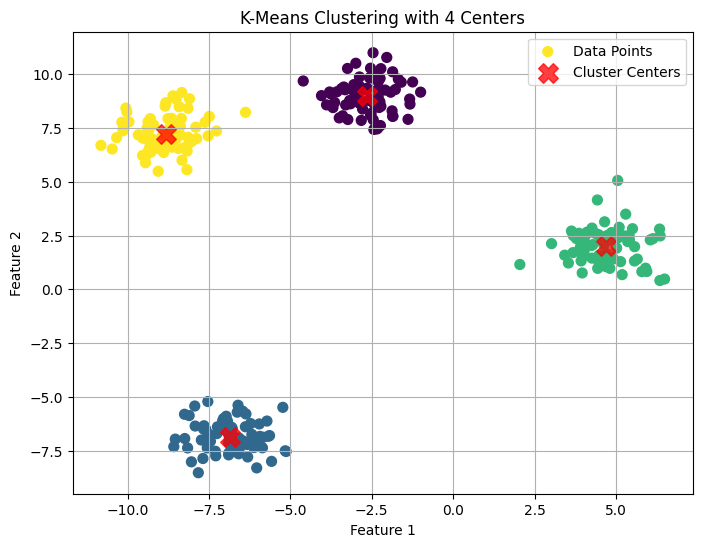

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# 1. Generate synthetic data with 4 centers
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.8, random_state=42)

# 2. Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)  # n_init to suppress warning
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
centers = kmeans.cluster_centers_

# 3. Visualize using a scatter plot
plt.figure(figsize=(8, 6))

# Plot the data points, colored by their assigned cluster
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis', label='Data Points')

# Plot the cluster centers
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, alpha=0.75, label='Cluster Centers')

plt.title('K-Means Clustering with 4 Centers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

**22. Load the Iris dataset and use Agglomerative Clustering to group the data into 3 clusters. Display the first 10 predicted labels.**

In [2]:
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

# Load the Iris dataset
iris = load_iris()
X = iris.data

# Apply Agglomerative Clustering with 3 clusters
agg_clustering = AgglomerativeClustering(n_clusters=3)
predicted_labels = agg_clustering.fit_predict(X)

# Display the first 10 predicted labels
print("First 10 predicted labels:")
print(predicted_labels[:10])

First 10 predicted labels:
[1 1 1 1 1 1 1 1 1 1]


**23. Generate synthetic data using make_moons and apply DBSCAN. Highlight outliers in the plot.**

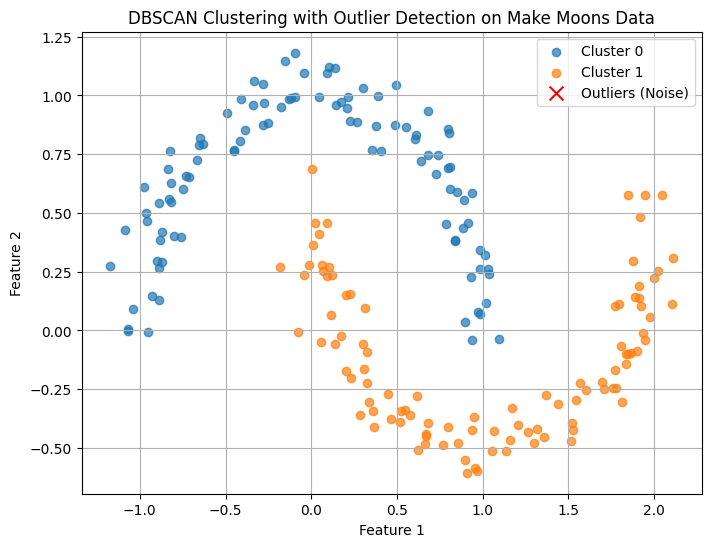

In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
import numpy as np

# 1. Generate synthetic data using make_moons
X, y = make_moons(n_samples=200, noise=0.08, random_state=42)

# 2. Apply DBSCAN
# Adjust eps and min_samples based on the data density and desired cluster definition
dbscan = DBSCAN(eps=0.3, min_samples=5)
clusters = dbscan.fit_predict(X)

# 3. Plotting the results and highlighting outliers
plt.figure(figsize=(8, 6))

# Identify outliers (noise points) - these are labeled as -1 by DBSCAN
outliers = X[clusters == -1]

# Plot the clusters
unique_clusters = np.unique(clusters[clusters != -1])
for cluster_label in unique_clusters:
    cluster_points = X[clusters == cluster_label]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster_label}', alpha=0.7)

# Highlight outliers
plt.scatter(outliers[:, 0], outliers[:, 1], color='red', marker='x', s=100, label='Outliers (Noise)')

plt.title('DBSCAN Clustering with Outlier Detection on Make Moons Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

**24. Load the Wine dataset and apply K-Means clustering after standardizing the features. Print the size of each cluster.**

In [4]:
import numpy as np
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from collections import Counter

# 1. Load the Wine dataset
wine = load_wine()
X = wine.data # Features
# The target variable y is available in wine.target, but K-Means is unsupervised,
# so we only use the features X for clustering.

# 2. Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Apply K-Means clustering
# We set n_clusters=3 because the original dataset has 3 classes
# We also set a random_state for reproducibility
kmeans_model = KMeans(n_clusters=3, init='k-means++', random_state=42, n_init=10)
kmeans_model.fit(X_scaled)

# Get the cluster labels for each data point
cluster_labels = kmeans_model.labels_

# 4. Print the size of each cluster
cluster_sizes = Counter(cluster_labels)

print("Cluster sizes:")
for cluster_id, count in cluster_sizes.items():
    print(f"Cluster {cluster_id}: {count} samples")

Cluster sizes:
Cluster 2: 62 samples
Cluster 0: 65 samples
Cluster 1: 51 samples


**25. Use make_circles to generate synthetic data and cluster it using DBSCAN. Plot the result.**

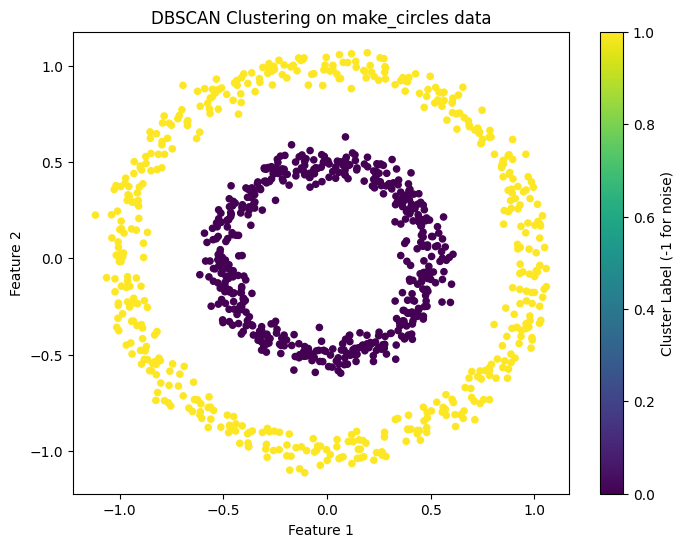

In [5]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.cluster import DBSCAN

# 1. Generate synthetic data using make_circles
n_samples = 1000
X, _ = make_circles(n_samples=n_samples, noise=0.05, factor=0.5, random_state=42)

# 2. Apply DBSCAN clustering
# Adjust eps and min_samples based on the dataset characteristics
dbscan = DBSCAN(eps=0.1, min_samples=5)
clusters = dbscan.fit_predict(X)

# 3. Plot the result
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', s=20)
plt.title('DBSCAN Clustering on make_circles data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(scatter, label='Cluster Label (-1 for noise)')
plt.show()

**26. Load the Breast Cancer dataset, apply MinMaxScaler, and use K-Means with 2 clusters. Output the cluster centroids.**

In [6]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# 1. Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
feature_names = data.feature_names

# 2. Apply MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 3. Use K-Means with 2 clusters
# Set a random state for reproducibility
kmeans = KMeans(n_clusters=2, random_state=0, n_init='auto')
kmeans.fit(X_scaled)

# 4. Output the cluster centroids
centroids_scaled = kmeans.cluster_centers_

print("Cluster Centroids (scaled values):")
# Print centroids in a more readable format, optionally with feature names
for i, centroid in enumerate(centroids_scaled):
    print(f"\nCentroid {i+1}:")
    for feature_name, value in zip(feature_names, centroid):
        print(f"  {feature_name}: {value:.4f}")

# Optional: To get the centroids back in the original scale
centroids_original_scale = scaler.inverse_transform(centroids_scaled)
print("\nCluster Centroids (original scale values):")
for i, centroid in enumerate(centroids_original_scale):
    print(f"\nCentroid {i+1}:")
    for feature_name, value in zip(feature_names, centroid):
        print(f"  {feature_name}: {value:.4f}")

Cluster Centroids (scaled values):

Centroid 1:
  mean radius: 0.2554
  mean texture: 0.2883
  mean perimeter: 0.2470
  mean area: 0.1439
  mean smoothness: 0.3574
  mean compactness: 0.1802
  mean concavity: 0.1034
  mean concave points: 0.1307
  mean symmetry: 0.3401
  mean fractal dimension: 0.2559
  radius error: 0.0643
  texture error: 0.1884
  perimeter error: 0.0598
  area error: 0.0287
  smoothness error: 0.1816
  compactness error: 0.1324
  concavity error: 0.0582
  concave points error: 0.1807
  symmetry error: 0.1722
  fractal dimension error: 0.0840
  worst radius: 0.2052
  worst texture: 0.3207
  worst perimeter: 0.1924
  worst area: 0.0994
  worst smoothness: 0.3571
  worst compactness: 0.1487
  worst concavity: 0.1314
  worst concave points: 0.2623
  worst symmetry: 0.2264
  worst fractal dimension: 0.1544

Centroid 2:
  mean radius: 0.5048
  mean texture: 0.3956
  mean perimeter: 0.5058
  mean area: 0.3638
  mean smoothness: 0.4699
  mean compactness: 0.4223
  mean conc

**27. Generate synthetic data using make_blobs with varying cluster standard deviations and cluster with DBSCAN.**

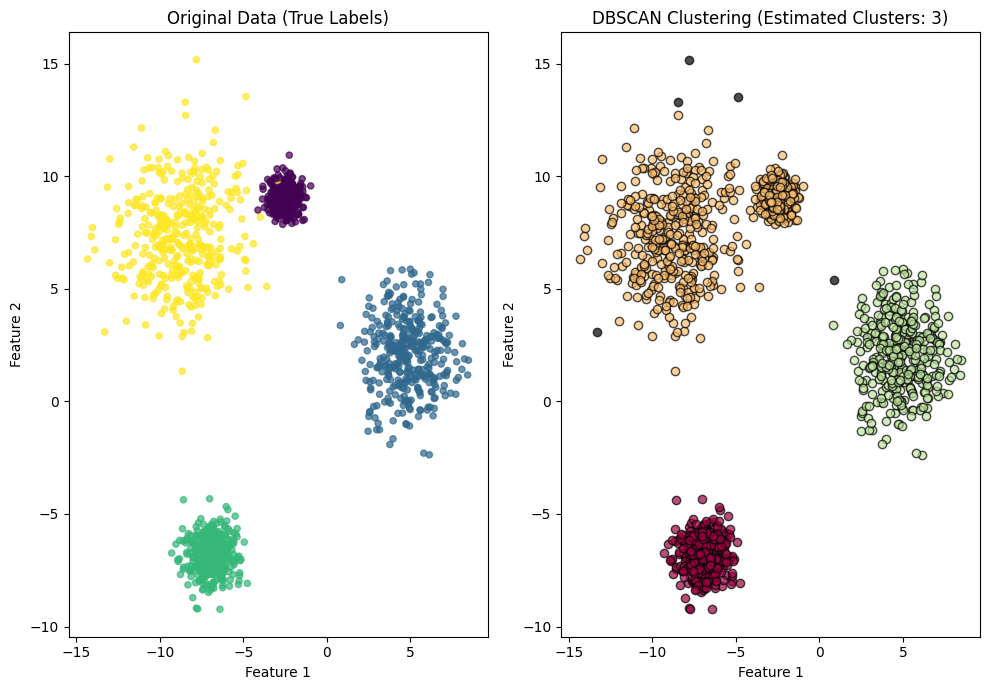

Estimated number of clusters by DBSCAN: 3
Estimated number of noise points by DBSCAN: 5


In [7]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# 1. Generate synthetic data with varying cluster standard deviations
n_samples = 1500
n_features = 2
n_centers = 4
cluster_stds = [0.5, 1.5, 0.8, 2.0]  # Varying standard deviations for each cluster

X, y_true = make_blobs(
    n_samples=n_samples,
    n_features=n_features,
    centers=n_centers,
    cluster_std=cluster_stds,
    random_state=42,
)

# Scale the data for better DBSCAN performance (optional but recommended)
X_scaled = StandardScaler().fit_transform(X)

# 2. Cluster with DBSCAN
# Adjust eps and min_samples based on the data density and desired cluster characteristics
dbscan = DBSCAN(eps=0.3, min_samples=10)
clusters = dbscan.fit_predict(X_scaled)

# 3. Visualize the results
plt.figure(figsize=(10, 7))

# Plot original data (for comparison, colored by true labels)
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y_true, cmap='viridis', s=20, alpha=0.7)
plt.title('Original Data (True Labels)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Plot DBSCAN clusters
plt.subplot(1, 2, 2)
# Handle noise points (-1) in a distinct color, e.g., black
unique_labels = set(clusters)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:  # Noise points
        col = [0, 0, 0, 1]  # Black color for noise

    class_member_mask = (clusters == k)

    xy = X[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6, alpha=0.7)

plt.title(f'DBSCAN Clustering (Estimated Clusters: {len(unique_labels) - (1 if -1 in unique_labels else 0)})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()

# Print the number of clusters found by DBSCAN and the number of noise points
n_clusters_ = len(set(clusters)) - (1 if -1 in clusters else 0)
n_noise_ = list(clusters).count(-1)
print(f"Estimated number of clusters by DBSCAN: {n_clusters_}")
print(f"Estimated number of noise points by DBSCAN: {n_noise_}")

**28. Load the Digits dataset, reduce it to 2D using PCA, and visualize clusters from K-Means.**

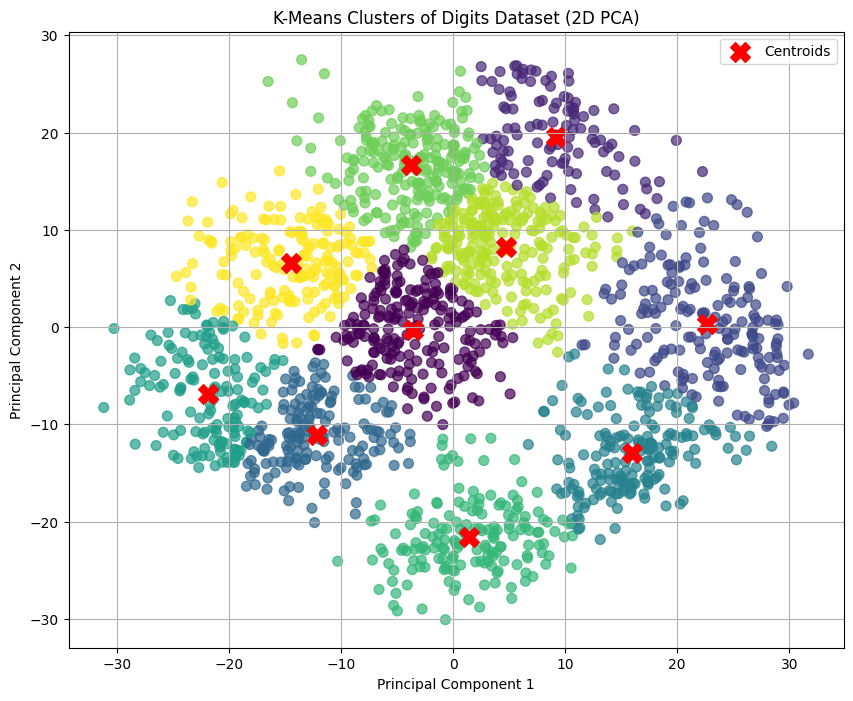

In [8]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# 1. Load the Digits dataset
digits = load_digits()
data = digits.data
labels = digits.target

# 2. Reduce the dataset to 2D using PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data)

# 3. Perform K-Means clustering
# We know there are 10 distinct digits, so we set n_clusters to 10
kmeans = KMeans(n_clusters=10, random_state=42, n_init=10) # n_init for robustness
kmeans.fit(reduced_data)
cluster_labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# 4. Visualize the clusters
plt.figure(figsize=(10, 8))

# Plot each data point, colored by its assigned cluster
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=cluster_labels, cmap='viridis', s=50, alpha=0.7)

# Plot the cluster centroids
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, color='red', label='Centroids')

plt.title('K-Means Clusters of Digits Dataset (2D PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

**29.  Create synthetic data using make_blobs and evaluate silhouette scores for k = 2 to 5. Display as a bar chart.**

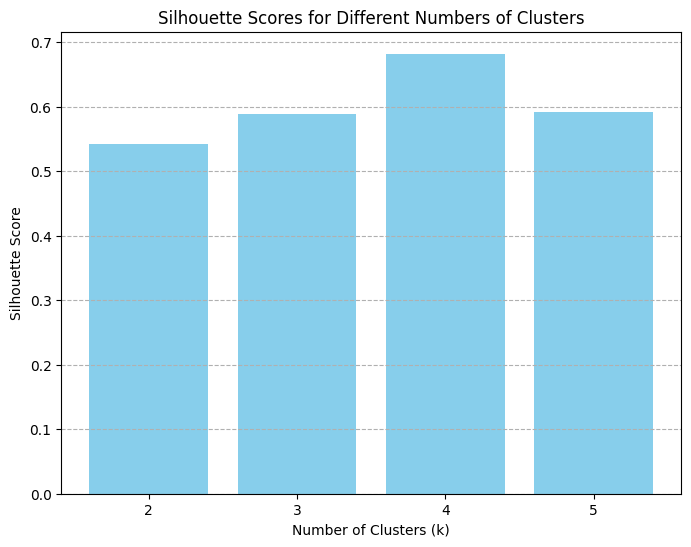

Silhouette Score for k=2: 0.5426
Silhouette Score for k=3: 0.5890
Silhouette Score for k=4: 0.6820
Silhouette Score for k=5: 0.5924


In [9]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# 1. Generate synthetic data
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# 2. Evaluate silhouette scores for k = 2 to 5
k_values = range(2, 6)
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10) # n_init to suppress warning
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

# 3. Display as a bar chart
plt.figure(figsize=(8, 6))
plt.bar(k_values, silhouette_scores, color='skyblue')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xticks(k_values)
plt.grid(axis='y', linestyle='--')
plt.show()

# Optional: Print the scores
for i, k in enumerate(k_values):
    print(f"Silhouette Score for k={k}: {silhouette_scores[i]:.4f}")

**30.  Load the Iris dataset and use hierarchical clustering to group data. Plot a dendrogram with average linkage.**

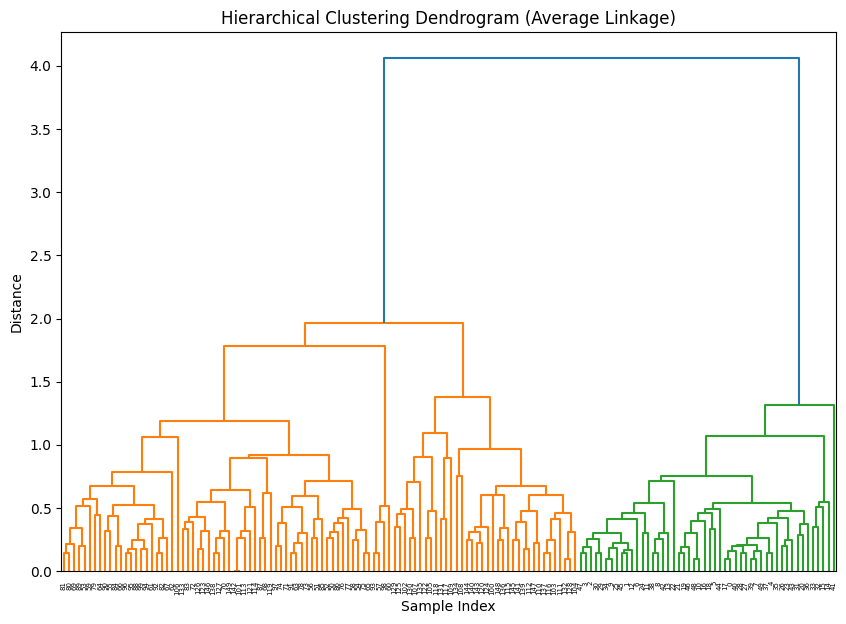

In [10]:
import pandas as pd
from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Perform hierarchical clustering using average linkage
linked = linkage(iris_df, method='average')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram (Average Linkage)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

**31. Generate synthetic data with overlapping clusters using make_blobs, then apply K-Means and visualize with decision boundaries.**

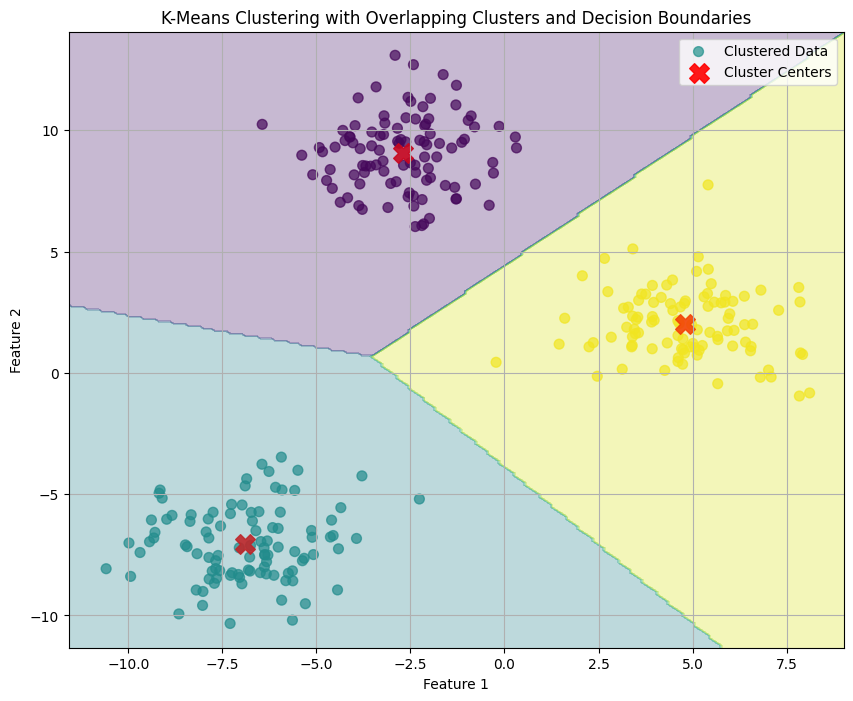

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# 1. Generate synthetic data with overlapping clusters
n_samples = 300
n_features = 2
n_centers = 3
cluster_std = 1.5  # Increase standard deviation for overlapping clusters
random_state = 42

X, y_true = make_blobs(n_samples=n_samples, centers=n_centers,
                       n_features=n_features, cluster_std=cluster_std,
                       random_state=random_state)

# 2. Apply K-Means clustering
kmeans = KMeans(n_clusters=n_centers, random_state=random_state, n_init=10)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
centers = kmeans.cluster_centers_

# 3. Visualize with decision boundaries
plt.figure(figsize=(10, 8))

# Plot the data points
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis', alpha=0.7, label='Clustered Data')

# Plot the cluster centers
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.9, marker='X', label='Cluster Centers')

# Plotting the decision boundaries
# Create a mesh to plot the decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict cluster for each point in the mesh
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')

plt.title('K-Means Clustering with Overlapping Clusters and Decision Boundaries')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

**32. Load the Digits dataset and apply DBSCAN after reducing dimensions with t-SNE. Visualize the results.**

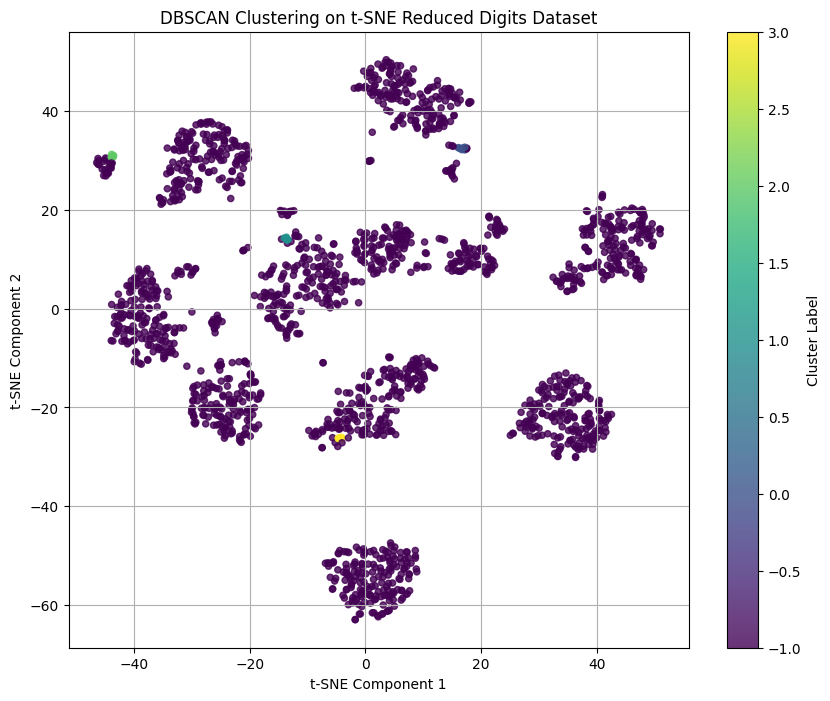

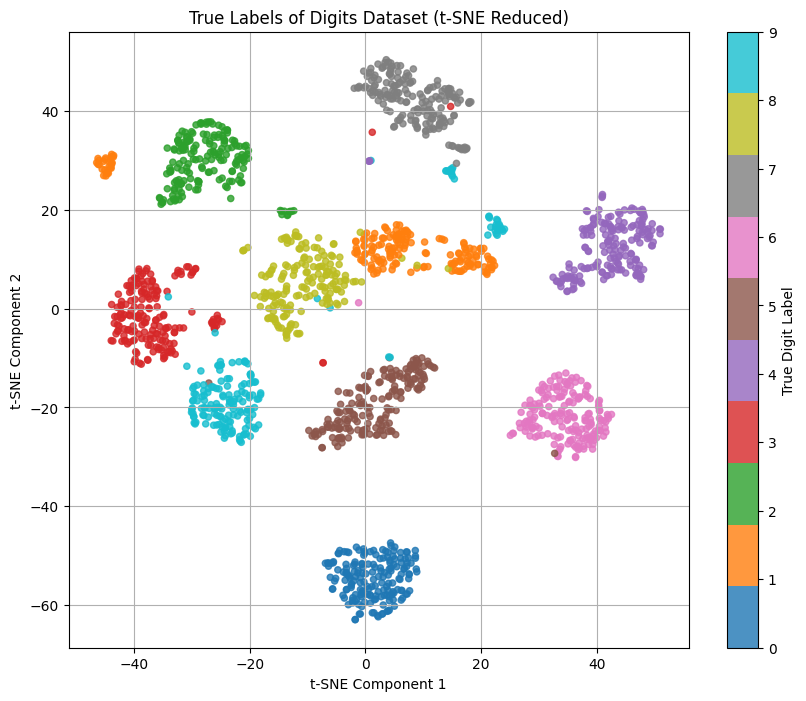

In [12]:
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE

# 1. Load the Digits dataset
digits = load_digits()
data = digits.data
target = digits.target  # True labels for comparison

# 2. Apply t-SNE for dimensionality reduction to 2 dimensions
tsne = TSNE(n_components=2, random_state=42)
data_tsne = tsne.fit_transform(data)

# 3. Apply DBSCAN clustering on the t-SNE reduced data
#    Adjust eps and min_samples based on the dataset and desired cluster density
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Example values, tune as needed
clusters = dbscan.fit_predict(data_tsne)

# 4. Visualize the results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    data_tsne[:, 0],
    data_tsne[:, 1],
    c=clusters,
    cmap="viridis",
    s=20,
    alpha=0.8,
)
plt.title("DBSCAN Clustering on t-SNE Reduced Digits Dataset")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.colorbar(scatter, label="Cluster Label")
plt.grid(True)
plt.show()

# Optional: Visualize with true labels for comparison
plt.figure(figsize=(10, 8))
scatter_true = plt.scatter(
    data_tsne[:, 0],
    data_tsne[:, 1],
    c=target,
    cmap="tab10",
    s=20,
    alpha=0.8,
)
plt.title("True Labels of Digits Dataset (t-SNE Reduced)")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.colorbar(scatter_true, label="True Digit Label")
plt.grid(True)
plt.show()

**33. Generate synthetic data using make_blobs and apply Agglomerative Clustering with complete linkage. Plot the result.**

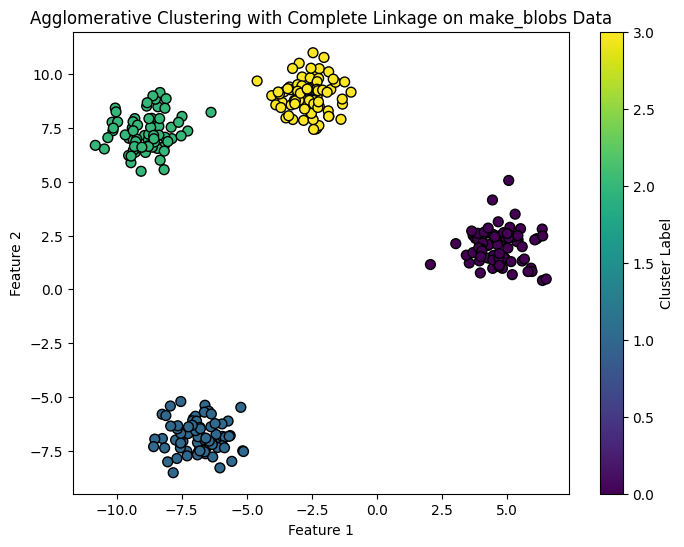

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering

# 1. Generate synthetic data
# Set a random seed for reproducibility
np.random.seed(42)
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.8, random_state=42)

# 2. Apply Agglomerative Clustering with 'complete' linkage
# Specify the number of clusters and the linkage criterion
agg_clustering = AgglomerativeClustering(n_clusters=4, linkage='complete')
# Fit and predict the cluster labels
y_pred = agg_clustering.fit_predict(X)

# 3. Plot the results
plt.figure(figsize=(8, 6))

# Scatter plot of data points colored by cluster label
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis', marker='o', edgecolor='k', s=50)

plt.title('Agglomerative Clustering with Complete Linkage on make_blobs Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster Label')
plt.show()

**34.  Load the Breast Cancer dataset and compare inertia values for K = 2 to 6 using K-Means. Show results in a line plot.**

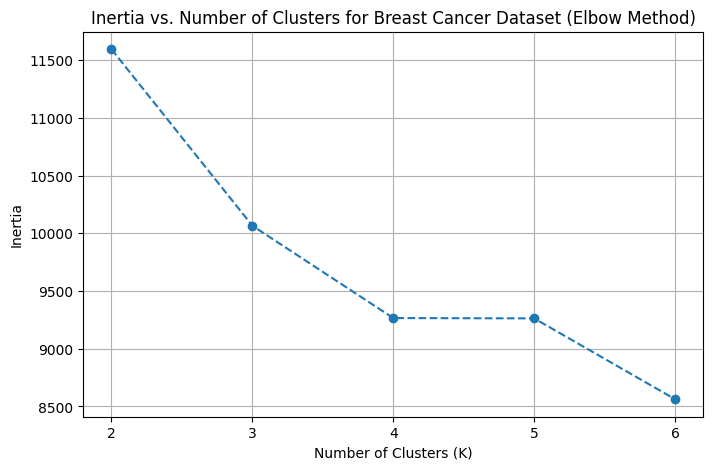

In [14]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load the breast cancer dataset
# The data consists of 30 features for 569 samples (tumors)
data = load_breast_cancer()
X = data.data

# It is good practice to scale the data when using K-Means,
# as the algorithm is sensitive to the scale of features.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Calculate inertia for K = 2 to 6
inertia_values = []
k_values = range(2, 7) # K=2, 3, 4, 5, 6

for k in k_values:
    # Initialize and fit the KMeans model
    # n_init='auto' is used in newer sklearn versions
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_scaled)
    # Append the inertia (sum of squared distances to centroids) to the list
    inertia_values.append(kmeans.inertia_)

# Plot the results
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia_values, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Inertia vs. Number of Clusters for Breast Cancer Dataset (Elbow Method)')
plt.xticks(k_values)
plt.grid(True)
plt.show()

**35. Generate synthetic concentric circles using make_circles and cluster using Agglomerative Clustering with single linkage.**

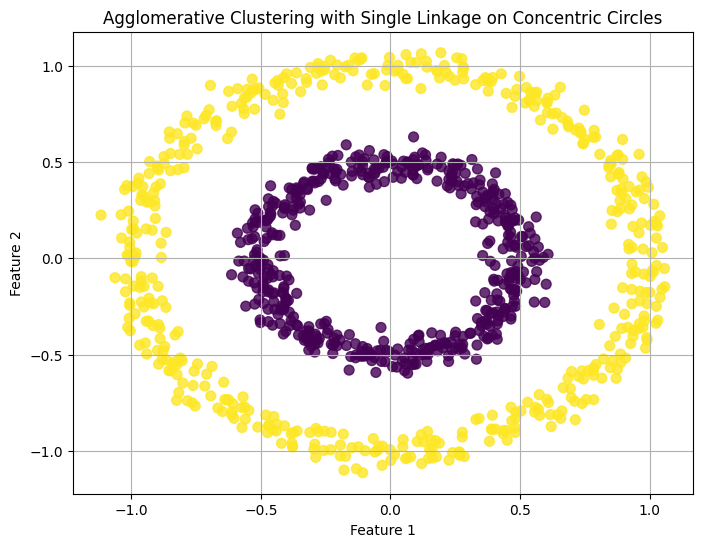

In [15]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.cluster import AgglomerativeClustering

# 1. Generate synthetic concentric circles data
n_samples = 1000
X, y = make_circles(n_samples=n_samples, noise=0.05, factor=0.5, random_state=42)

# 2. Apply Agglomerative Clustering with single linkage
# We expect 2 clusters for concentric circles
n_clusters = 2
agglomerative = AgglomerativeClustering(n_clusters=n_clusters, linkage='single')
labels = agglomerative.fit_predict(X)

# 3. Visualize the results
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.8)
plt.title('Agglomerative Clustering with Single Linkage on Concentric Circles')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

36.  Use the Wine dataset, apply DBSCAN after scaling the data, and count the number of clusters (excluding noise).

In [16]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

# 1. Load the Wine Dataset
wine = load_wine()
X = wine.data

# 2. Scale the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Apply DBSCAN
# You might need to tune eps and min_samples for optimal results
# These values are chosen for demonstration and may not be optimal for the Wine dataset
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(X_scaled)

# 4. Count Clusters (excluding noise)
# Noise points are labeled as -1
num_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)

print(f"Number of clusters found (excluding noise): {num_clusters}")

Number of clusters found (excluding noise): 0


**37. Generate synthetic data with make_blobs and apply KMeans. Then plot the cluster centers on top of the data points.**

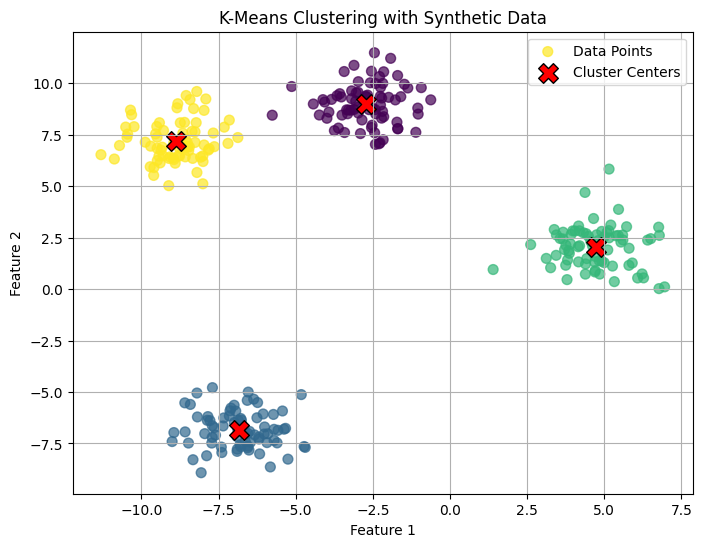

In [17]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# 1. Generate synthetic data
n_samples = 300
n_features = 2
n_centers = 4  # Number of clusters to generate and find
random_state = 42  # For reproducibility

X, _ = make_blobs(n_samples=n_samples, n_features=n_features,
                  centers=n_centers, cluster_std=1.0, random_state=random_state)

# 2. Apply K-Means clustering
kmeans = KMeans(n_clusters=n_centers, random_state=random_state, n_init='auto')
kmeans.fit(X)

# Get cluster labels and centers
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# 3. Plot the data points and cluster centers
plt.figure(figsize=(8, 6))

# Plot data points, colored by their assigned cluster
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis', alpha=0.7, label='Data Points')

# Plot cluster centers
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X',
            edgecolor='black', label='Cluster Centers')

plt.title('K-Means Clustering with Synthetic Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

**38. Load the Iris dataset, cluster with DBSCAN, and print how many samples were identified as noise.**

In [18]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data

# Apply DBSCAN clustering
# You might need to adjust 'eps' and 'min_samples' based on your data and desired clustering behavior.
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

# Count the number of noise samples (labeled as -1)
noise_samples = np.sum(dbscan_labels == -1)

# Print the result
print(f"Number of samples identified as noise: {noise_samples}")

Number of samples identified as noise: 17


**39. Generate synthetic non-linearly separable data using make_moons, apply K-Means, and visualize the clustering result.**

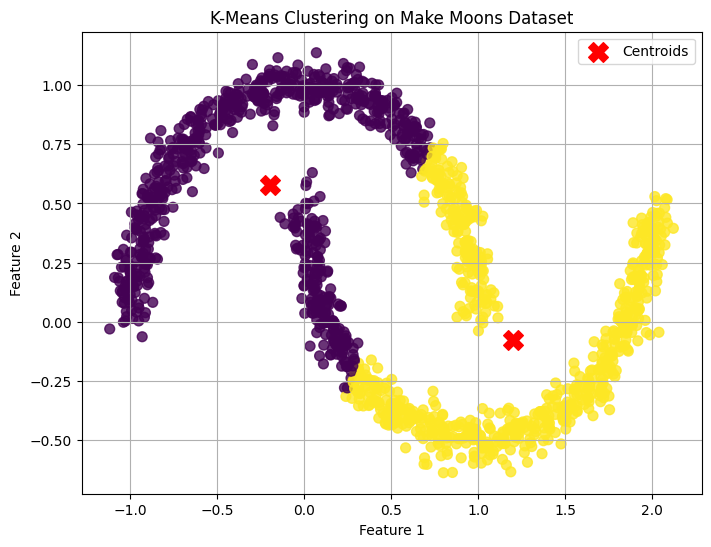

In [19]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans

# 1. Generate synthetic non-linearly separable data using make_moons
n_samples = 1500
X, y = make_moons(n_samples=n_samples, noise=0.05, random_state=42)

# 2. Apply K-Means clustering
# We know there are two underlying "moons", so we set n_clusters=2
kmeans = KMeans(n_clusters=2, random_state=42, n_init='auto')
kmeans.fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# 3. Visualize the clustering result
plt.figure(figsize=(8, 6))

# Plot the data points, colored by their assigned cluster
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.8)

# Plot the cluster centroids
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, color='red', label='Centroids')

plt.title('K-Means Clustering on Make Moons Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

**40.  Load the Digits dataset, apply PCA to reduce to 3 components, then use KMeans and visualize with a 3D scatter plot.**

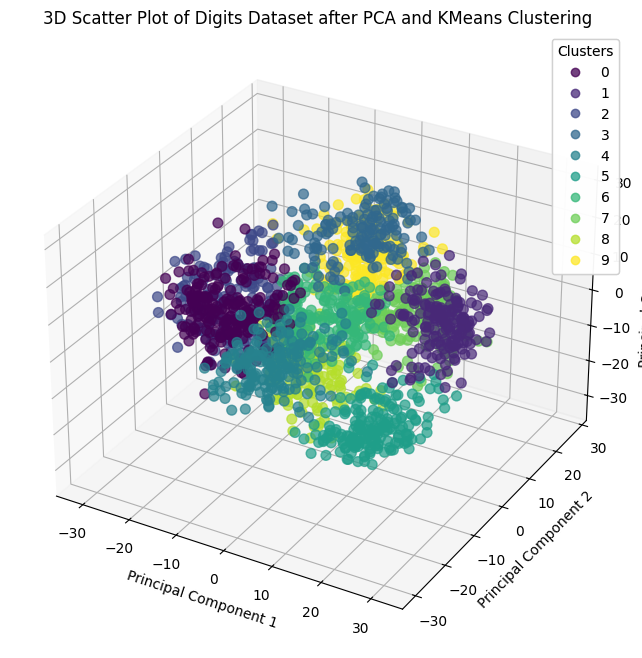

In [20]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits

# 1. Load the Digits dataset
digits = load_digits()
data = digits.data
target = digits.target # Not used for clustering, but useful for comparison later

# 2. Apply PCA to reduce to 3 components
pca = PCA(n_components=3)
reduced_data = pca.fit_transform(data)

# 3. Use KMeans clustering
# We'll assume 10 clusters, as there are 10 digits (0-9)
kmeans = KMeans(n_clusters=10, random_state=42, n_init=10)
clusters = kmeans.fit_predict(reduced_data)

# 4. Visualize with a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot each point, colored by its assigned cluster
scatter = ax.scatter(reduced_data[:, 0], reduced_data[:, 1], reduced_data[:, 2], c=clusters, cmap='viridis', s=50, alpha=0.7)

# Add labels and title
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D Scatter Plot of Digits Dataset after PCA and KMeans Clustering')

# Add a color bar to show cluster mapping
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.show()

**41. Generate synthetic blobs with 5 centers and apply KMeans. Then use silhouette_score to evaluate the clustering.**

Silhouette Score for KMeans with 5 clusters: 0.6779


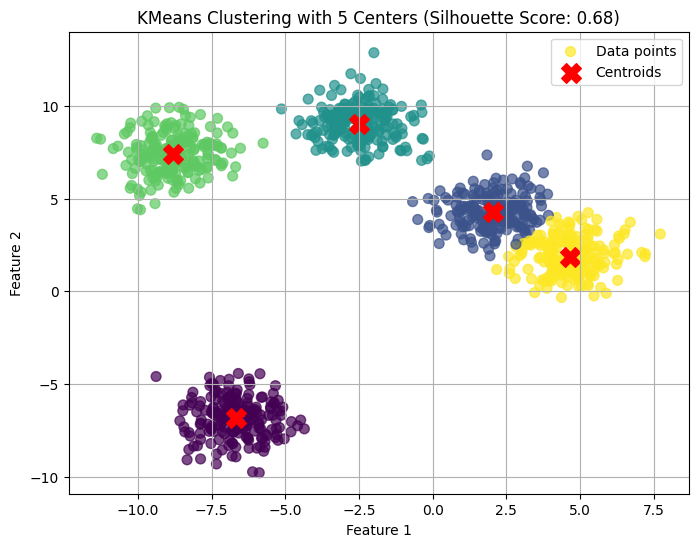

In [21]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# 1. Generate synthetic blobs with 5 centers
n_samples = 1000
n_features = 2
n_centers = 5
random_state = 42

X, y_true = make_blobs(n_samples=n_samples, centers=n_centers,
                       n_features=n_features, random_state=random_state)

# 2. Apply KMeans clustering
kmeans = KMeans(n_clusters=n_centers, random_state=random_state, n_init=10) # n_init to avoid warnings
kmeans.fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# 3. Evaluate clustering using silhouette_score
silhouette_avg = silhouette_score(X, labels)

print(f"Silhouette Score for KMeans with {n_centers} clusters: {silhouette_avg:.4f}")

#Visualize the clusters and centroids
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7, label='Data points')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title(f'KMeans Clustering with {n_centers} Centers (Silhouette Score: {silhouette_avg:.2f})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

42. Load the Breast Cancer dataset, reduce dimensionality using PCA, and apply Agglomerative Clustering. Visualize in 2D.

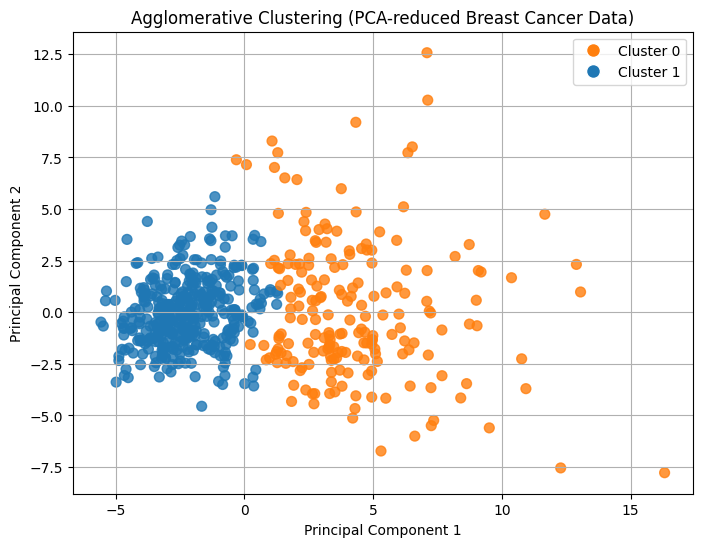

In [22]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import pandas as pd
import numpy as np

# 1. Load the Breast Cancer dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
target_names = cancer.target_names

# 2. Standardize the data (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Reduce dimensionality to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 4. Apply Agglomerative Clustering
# We set n_clusters=2 to match the known classes (malignant/benign)
agg_clustering = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
clusters = agg_clustering.fit_predict(X_pca)

# 5. Visualize in 2D
plt.figure(figsize=(8, 6))

# Define colors and markers for visualization
colors = np.array(['#ff7f0e', '#1f77b4']) # Orange for malignant, Blue for benign (or vice versa, based on cluster labels)
# Note: Clustering is unsupervised, so cluster labels (0, 1) might not directly map to target names (malignant, benign).

# Scatter plot for the two clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=colors[clusters], s=50, alpha=0.8)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Agglomerative Clustering (PCA-reduced Breast Cancer Data)')
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', label=f'Cluster {i}',
                               markerfacecolor=colors[i], markersize=10) for i in range(2)])
plt.grid(True)
plt.show()

**43. Generate noisy circular data using make_circles and visualize clustering results from KMeans and DBSCAN side-by-side.**

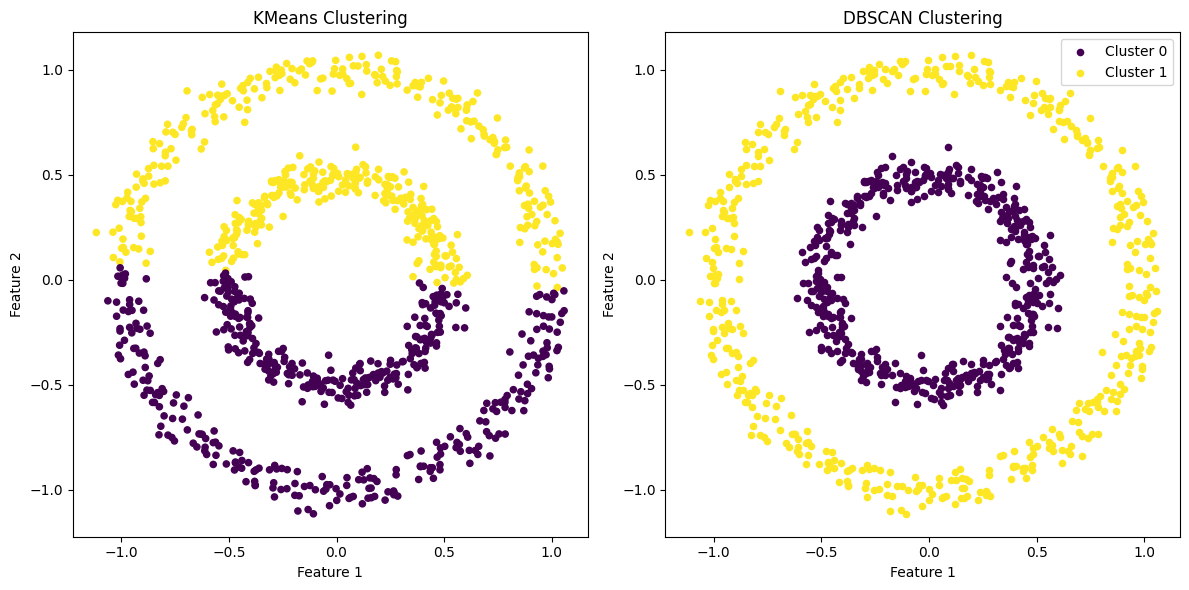

In [23]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.cluster import KMeans, DBSCAN
import numpy as np

# 1. Generate noisy circular data
n_samples = 1000
factor = 0.5
noise = 0.05
X, y = make_circles(n_samples=n_samples, factor=factor, noise=noise, random_state=42)

# 2. Apply KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10) # n_init is set to suppress a warning
kmeans_labels = kmeans.fit_predict(X)

# 3. Apply DBSCAN clustering
# Adjust eps and min_samples based on the data density.
# For make_circles with noise=0.05, eps around 0.1 to 0.2 often works well.
# min_samples is typically chosen based on the dimensionality of the data (2*dim for 2D).
dbscan = DBSCAN(eps=0.15, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

# 4. Visualize the results
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# KMeans Visualization
axes[0].scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis', s=20)
axes[0].set_title('KMeans Clustering')
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')

# DBSCAN Visualization
# DBSCAN labels -1 indicate noise points, which can be visualized differently.
unique_dbscan_labels = np.unique(dbscan_labels)
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_dbscan_labels)))

for i, label in enumerate(unique_dbscan_labels):
    if label == -1:  # Noise points
        axes[1].scatter(X[dbscan_labels == label, 0], X[dbscan_labels == label, 1],
                        color='grey', marker='x', s=20, label='Noise')
    else:
        axes[1].scatter(X[dbscan_labels == label, 0], X[dbscan_labels == label, 1],
                        color=colors[i], s=20, label=f'Cluster {label}')
axes[1].set_title('DBSCAN Clustering')
axes[1].set_xlabel('Feature 1')
axes[1].set_ylabel('Feature 2')
axes[1].legend()

plt.tight_layout()
plt.show()

**44.  Load the Iris dataset and plot the Silhouette Coefficient for each sample after KMeans clustering.**

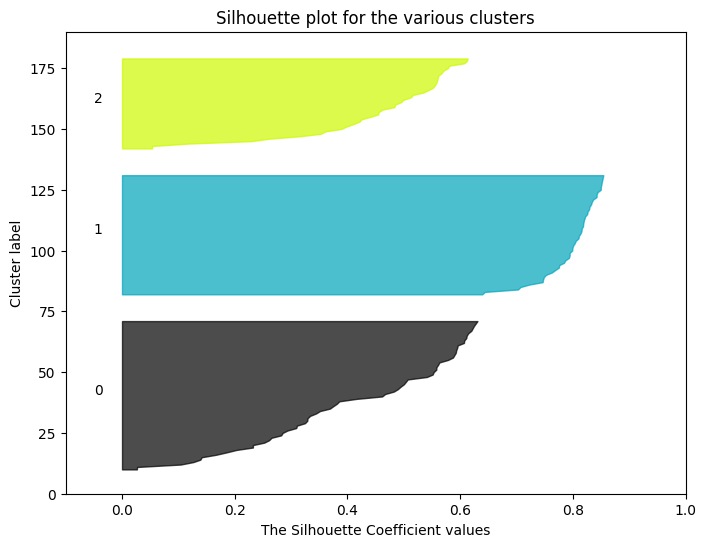

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.metrics import silhouette_samples

# Load the Iris dataset
iris = load_iris()
X = iris.data

# Perform KMeans clustering
# Assuming 3 clusters as the Iris dataset has 3 species
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X)

# Calculate the Silhouette Coefficient for each sample
silhouette_per_sample = silhouette_samples(X, cluster_labels)

# Plot the Silhouette Coefficient for each sample
y_lower = 10
fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(8, 6)

ax1.set_xlim([-0.1, 1])
ax1.set_ylim([0, len(X) + (3 + 1) * 10])  # Adjust y-axis limits

for i in range(3):  # Iterate through each cluster
    # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
    ith_cluster_silhouette_values = silhouette_per_sample[cluster_labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.nipy_spectral(float(i) / 3)  # Assign a color for the cluster
    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7,
    )

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("Silhouette plot for the various clusters")
ax1.set_xlabel("The Silhouette Coefficient values")
ax1.set_ylabel("Cluster label")

plt.show()

45.  Generate synthetic data using make_blobs and apply Agglomerative Clustering with 'average' linkage. Visualize clusters.

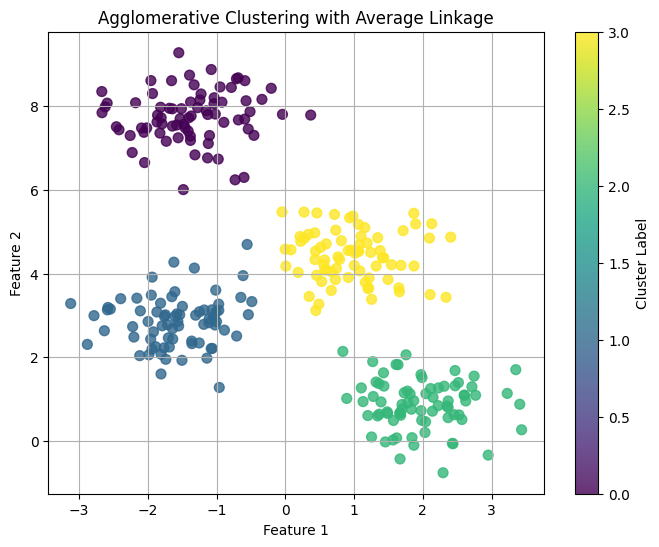

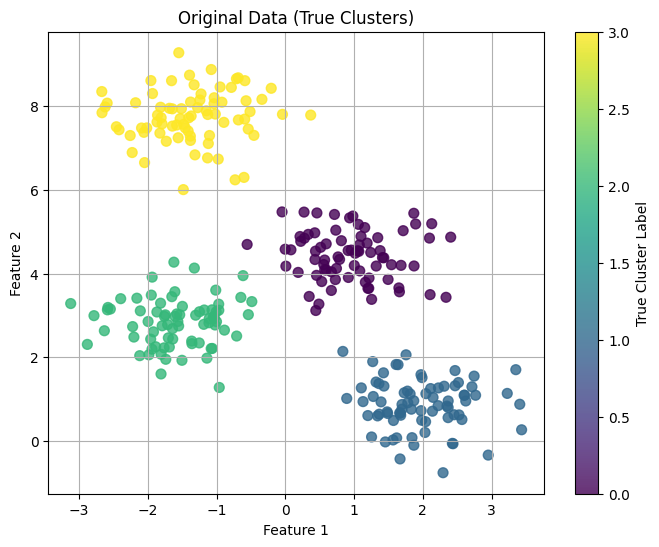

In [26]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering

# 1. Generate synthetic data
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# 2. Apply Agglomerative Clustering with 'average' linkage
# We specify n_clusters as 4, matching the number of true centers in make_blobs
agg_clustering = AgglomerativeClustering(n_clusters=4, linkage='average')
labels = agg_clustering.fit_predict(X)

# 3. Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.8)
plt.title('Agglomerative Clustering with Average Linkage')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster Label')
plt.grid(True)
plt.show()

#Visualize the true clusters for comparison
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_true, cmap='viridis', s=50, alpha=0.8)
plt.title('Original Data (True Clusters)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='True Cluster Label')
plt.grid(True)
plt.show()

**46. Load the Wine dataset, apply KMeans, and visualize the cluster assignments in a seaborn pairplot (first 4 features).**

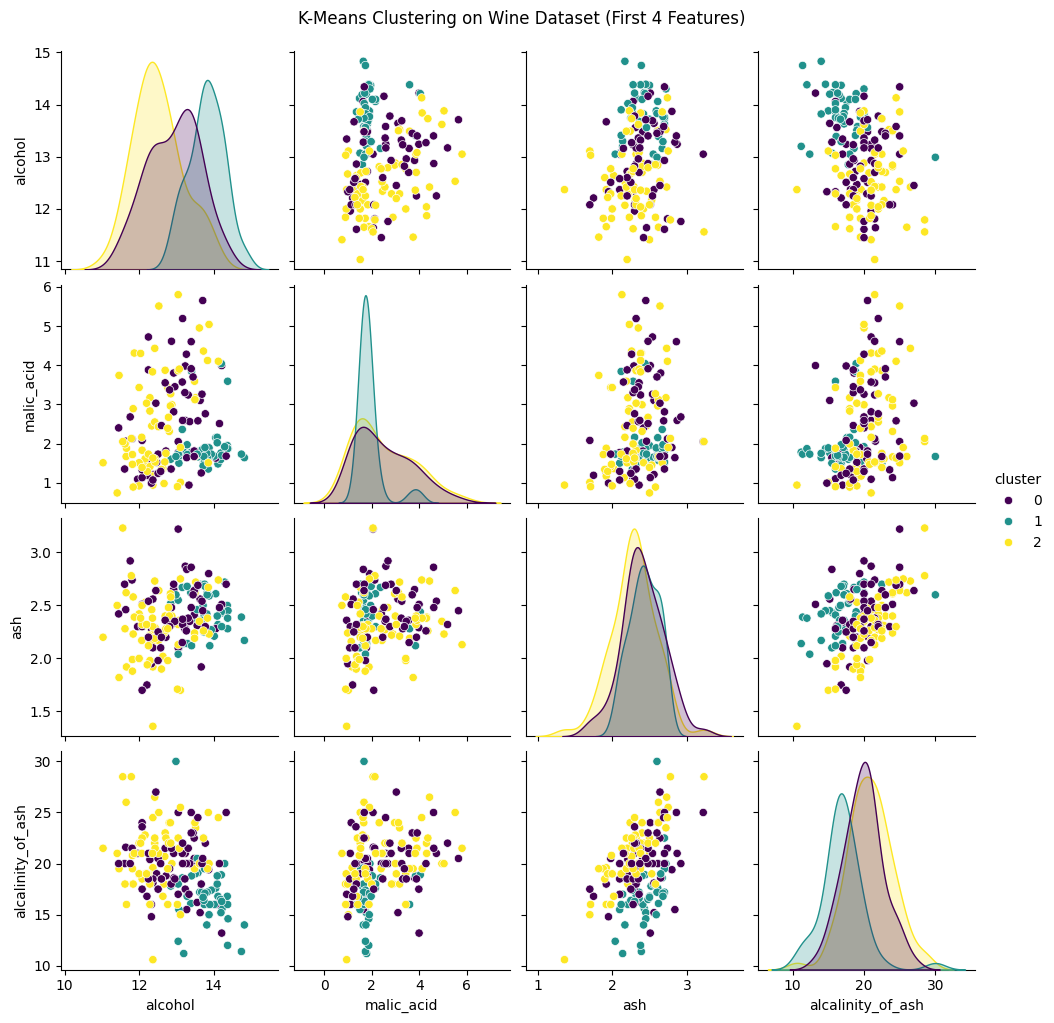

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans

# Load the Wine dataset
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)

# Apply KMeans clustering (assuming 3 clusters as there are 3 wine classes)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10) # n_init is set to suppress a warning
X['cluster'] = kmeans.fit_predict(X)

# Select the first 4 features for visualization
features_to_plot = X.columns[:4].tolist() + ['cluster']
df_plot = X[features_to_plot]

# Visualize the cluster assignments using a seaborn pairplot
sns.pairplot(df_plot, hue='cluster', palette='viridis')
plt.suptitle('K-Means Clustering on Wine Dataset (First 4 Features)', y=1.02)
plt.show()

**47. Generate noisy blobs using make_blobs and use DBSCAN to identify both clusters and noise points. Print the count.**

In [28]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN

# 1. Generate noisy blobs
# n_samples: total number of points
# centers: number of cluster centers or array-like of center locations
# cluster_std: standard deviation of the clusters (introduces noise)
# random_state: for reproducibility
X, _ = make_blobs(n_samples=500, centers=3, cluster_std=0.8, random_state=42)

# 2. Apply DBSCAN
# eps: The maximum distance between two samples for one to be considered as in the neighborhood of the other.
# min_samples: The number of samples (or total weight) in a neighborhood for a point to be considered as a core point.
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(X)

# 3. Identify and count clusters and noise points
# DBSCAN assigns a label of -1 to noise points
n_clusters_ = len(set(clusters)) - (1 if -1 in clusters else 0)
n_noise_ = list(clusters).count(-1)

print(f"Estimated number of clusters: {n_clusters_}")
print(f"Estimated number of noise points: {n_noise_}")

# Optional: Print count per cluster
unique_clusters = set(clusters)
for cluster_id in unique_clusters:
    if cluster_id != -1:
        count = list(clusters).count(cluster_id)
        print(f"Cluster {cluster_id} has {count} points.")

Estimated number of clusters: 3
Estimated number of noise points: 25
Cluster 0 has 159 points.
Cluster 1 has 156 points.
Cluster 2 has 160 points.


**48. Load the Digits dataset, reduce dimensions using t-SNE, then apply Agglomerative Clustering and plot the clusters.**

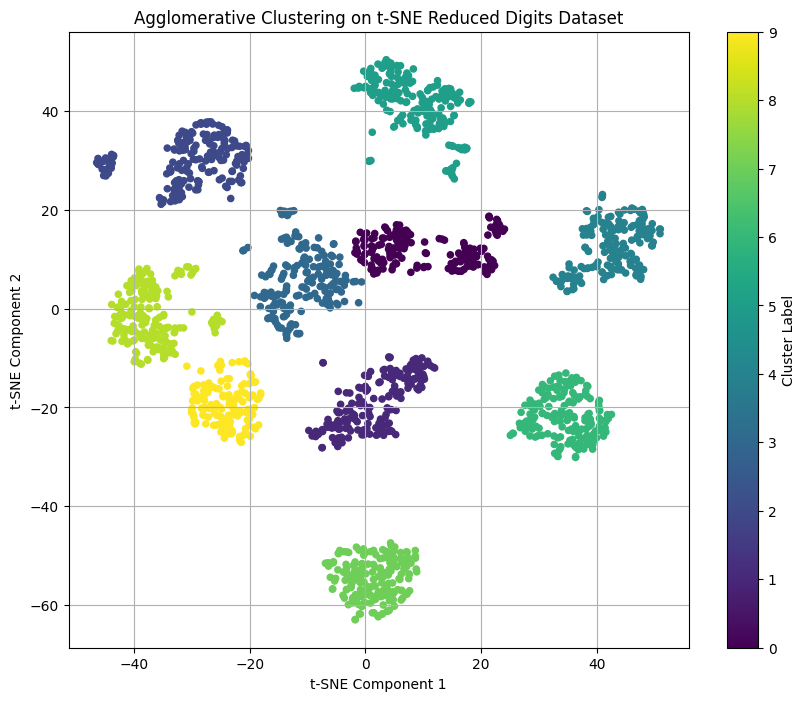

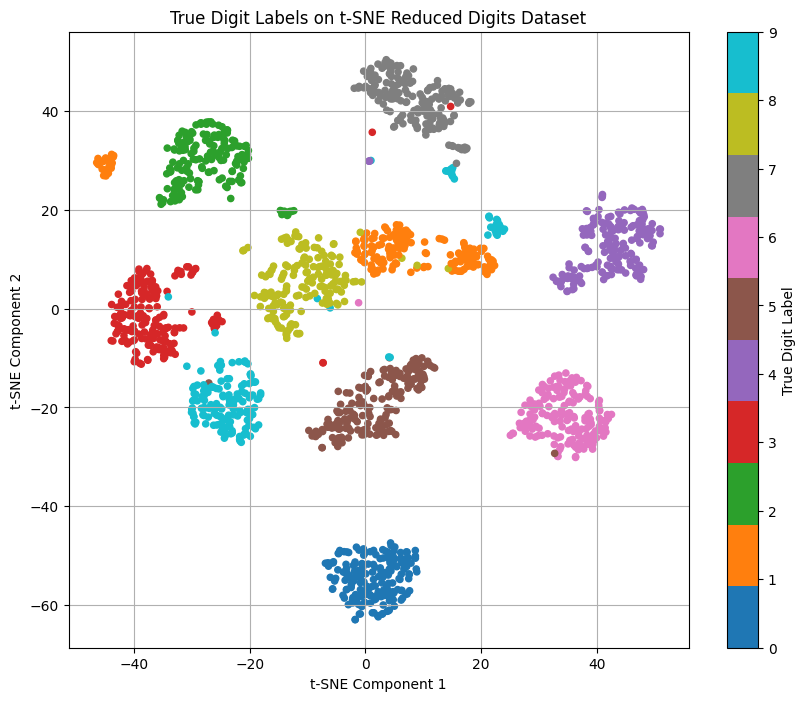

In [29]:
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE

# 1. Load the Digits dataset
digits = load_digits()
X = digits.data
y = digits.target  # True labels for comparison/coloring

# 2. Reduce dimensions using t-SNE
# It is recommended to apply a PCA step before t-SNE for datasets with many dimensions
# However, for the Digits dataset (64 dimensions), direct t-SNE is often acceptable.
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_reduced = tsne.fit_transform(X)

# 3. Apply Agglomerative Clustering
# We'll assume we want to find 10 clusters (corresponding to the 10 digits)
agg_clustering = AgglomerativeClustering(n_clusters=10, linkage="ward")
clusters = agg_clustering.fit_predict(X_reduced)

# 4. Plot the clusters
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=clusters, cmap="viridis", s=20)
plt.colorbar(scatter, label="Cluster Label")
plt.title("Agglomerative Clustering on t-SNE Reduced Digits Dataset")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.grid(True)
plt.show()

# Plot with true labels for comparison
plt.figure(figsize=(10, 8))
scatter_true = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap="tab10", s=20)
plt.colorbar(scatter_true, label="True Digit Label")
plt.title("True Digit Labels on t-SNE Reduced Digits Dataset")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.grid(True)
plt.show()